In [21]:
import simulation_tools as sim

import time

import pandas as pd
import numpy as np

from cmdstanpy import CmdStanModel
from IPython.display import display

In [22]:
# Remove cmdstanpy logs
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [23]:
num_repetitions = 100
prop_const = np.full(38, 0.5)
prop_varying = np.concatenate(
    (np.full(5, 0.5), np.linspace(0.5, 0.95, sim.CHICK_NUM_EXPTS - 5))
)

In [27]:
df_const_p = sim.evaluate_varying_sigma_b_means(
    model=CmdStanModel(stan_file="dynamic_hier.stan"),
    num_repetitions=num_repetitions,
    num_subjects_per_expt=np.repeat(
            sim.CHICK_NUM_SUBJECTS_PER_EXPT, sim.CHICK_NUM_EXPTS
        ),
    prop_treatment=prop_const,
    mu_b=0,
    mu_theta=sim.CHICK_MU_THETA,
    sigma_b_grid=sim.CHICK_SIGMA_B_GRID,
    sigma_theta=sim.CHICK_SIGMA_THETA,
    sigma_treatment=sim.CHICK_SIGMA_TREATMENT,
    sigma_control=sim.CHICK_SIGMA_CONTROL,
    show_progress=True,
)

Sigma b: 0.0. Run: 1/11
Sigma b: 0.01. Run: 2/11
Sigma b: 0.02. Run: 3/11
Sigma b: 0.03. Run: 4/11
Sigma b: 0.04. Run: 5/11
Sigma b: 0.05. Run: 6/11
Sigma b: 0.06. Run: 7/11
Sigma b: 0.07. Run: 8/11
Sigma b: 0.08. Run: 9/11
Sigma b: 0.09. Run: 10/11
Sigma b: 0.1. Run: 11/11
Took 552.82 seconds.


In [28]:
# First 5 experiments use p=0.5
# the rest increase linearly from p=0.5 to p=0.95

prop_treatment_varying = np.concatenate(
    (np.full(5, 0.5), np.linspace(0.5, 0.95, sim.CHICK_NUM_EXPTS - 5))
)
df_vary_p = sim.evaluate_varying_sigma_b_means(
    model=CmdStanModel(stan_file="dynamic_hier.stan"),
    num_repetitions=num_repetitions,
    num_subjects_per_expt=np.repeat(
            sim.CHICK_NUM_SUBJECTS_PER_EXPT, sim.CHICK_NUM_EXPTS
        ),
    prop_treatment=prop_varying,
    mu_b=0,
    mu_theta=sim.CHICK_MU_THETA,
    sigma_b_grid=sim.CHICK_SIGMA_B_GRID,
    sigma_theta=sim.CHICK_SIGMA_THETA,
    sigma_treatment=sim.CHICK_SIGMA_TREATMENT,
    sigma_control=sim.CHICK_SIGMA_CONTROL,
    show_progress=True,
)

Sigma b: 0.0. Run: 1/11
Sigma b: 0.01. Run: 2/11
Sigma b: 0.02. Run: 3/11
Sigma b: 0.03. Run: 4/11
Sigma b: 0.04. Run: 5/11
Sigma b: 0.05. Run: 6/11
Sigma b: 0.06. Run: 7/11
Sigma b: 0.07. Run: 8/11
Sigma b: 0.08. Run: 9/11
Sigma b: 0.09. Run: 10/11
Sigma b: 0.1. Run: 11/11
Took 623.56 seconds.


In [29]:
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Save df_const_p to a CSV file
df_const_p.to_csv(f"fake_data/df_const_p_{timestamp}.csv", index=False)

# Save df_vary_p to a CSV file
df_vary_p.to_csv(f"fake_data/df_vary_p_{timestamp}.csv", index=False)

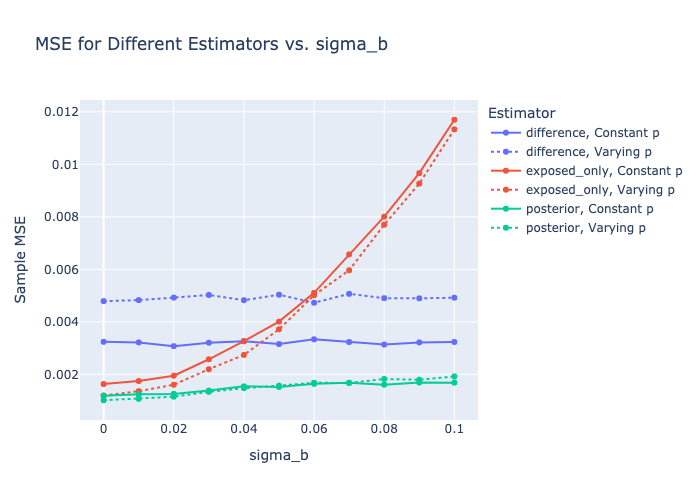

In [43]:
import plotly.express as px

# Create the plot using Plotly
fig_mse = px.line(
    pd.concat(
        [
            df_const_p.assign(LineStyle="Constant p"),
            df_vary_p.assign(LineStyle="Varying p"),
        ]
    ),
    x="sigma_b",
    y="sample_mse",
    color="estimator",
    line_dash="LineStyle",
    markers=True,
    title="MSE for Different Estimators vs. sigma_b",
    labels={"sigma_b": "sigma_b", "sample_mse": "Sample MSE"},
)

# Update the legend to remove linestyle
fig_mse.update_layout(legend_title_text="Estimator")
fig_mse.show("png")

In [39]:
print(df_const_p[df_const_p["estimator"] == "posterior"]["sample_mse"].mean())
print(df_vary_p[df_vary_p["estimator"] == "posterior"]["sample_mse"].mean())

0.0014938875830885561
0.0015007492382215599


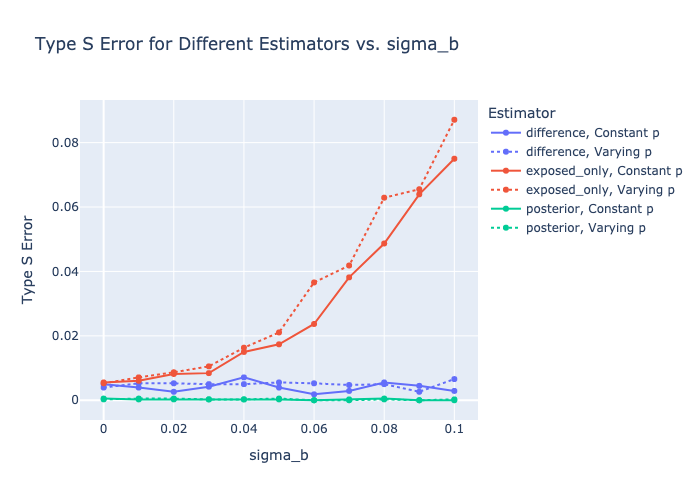

In [40]:
# Create the plot using Plotly
fig_type_s = px.line(
    pd.concat(
        [
            df_const_p.assign(LineStyle="Constant p"),
            df_vary_p.assign(LineStyle="Varying p"),
        ]
    ),
    x="sigma_b",
    y="type_s_rate",
    color="estimator",
    line_dash="LineStyle",
    markers=True,
    title="Type S Error for Different Estimators vs. sigma_b",
    labels={"sigma_b": "sigma_b", "type_s_rate": "Type S Error"},
)

# Update the legend to remove linestyle
fig_type_s.update_layout(legend_title_text="Estimator")
fig_type_s.show("png")


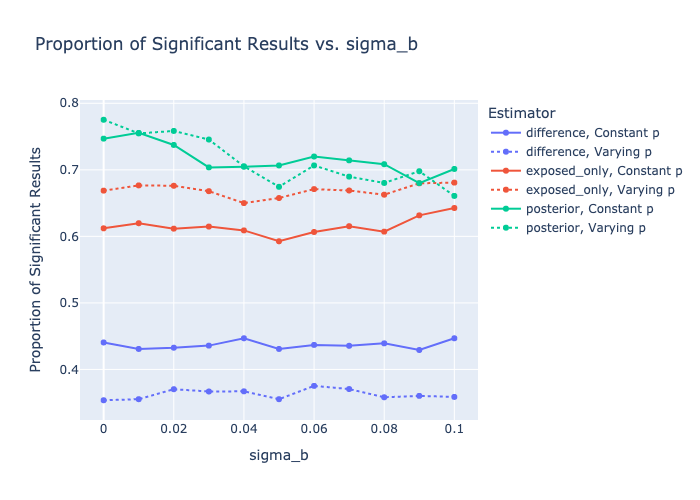

In [41]:
# Create the plot using Plotly
fig_prop_signif = px.line(
    pd.concat(
        [
            df_const_p.assign(LineStyle="Constant p"),
            df_vary_p.assign(LineStyle="Varying p"),
        ]
    ),
    x="sigma_b",
    y="prop_signif",
    color="estimator",
    line_dash="LineStyle",
    markers=True,
    title="Proportion of Significant Results vs. sigma_b",
    labels={"sigma_b": "sigma_b", "prop_signif": "Proportion of Significant Results"},
)

# Update the legend to remove linestyle
fig_prop_signif.update_layout(legend_title_text="Estimator")
fig_prop_signif.show("png")

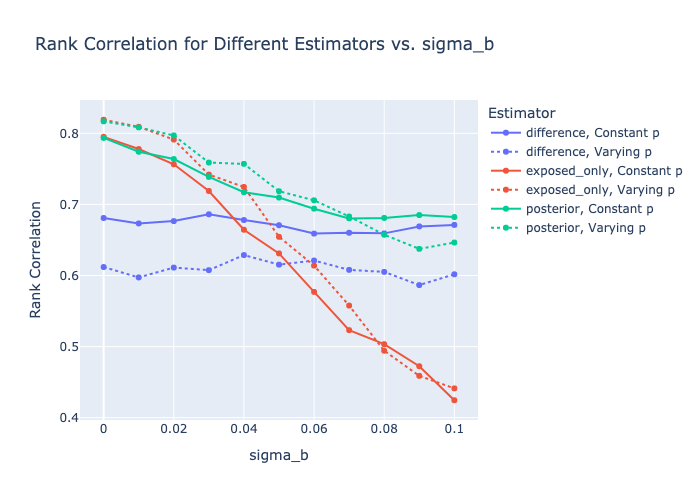

In [42]:
# Create the plot using Plotly
fig_rank_corr = px.line(
    pd.concat(
        [
            df_const_p.assign(LineStyle="Constant p"),
            df_vary_p.assign(LineStyle="Varying p"),
        ]
    ),
    x="sigma_b",
    y="rank_corr",
    color="estimator",
    line_dash="LineStyle",
    markers=True,
    title="Rank Correlation for Different Estimators vs. sigma_b",
    labels={"sigma_b": "sigma_b", "rank_corr": "Rank Correlation"},
)

# Update the legend to remove linestyle
fig_rank_corr.update_layout(legend_title_text="Estimator")
fig_rank_corr.show("png")